# Naive Bayes - Multinomial Classification


In [21]:
!uv pip install -q \
    numpy==2.3.2 \
    matplotlib==3.10.6 \
    seaborn==0.13.2 \
    scikit-learn==1.7.1


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

%matplotlib inline

sns.set_style("darkgrid")
sns.set_theme(style="darkgrid")

In [ ]:
data = fetch_20newsgroups()

data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories = [
    "talk.religion.misc",
    "soc.religion.christian",
    "sci.space",
    "comp.graphics",
]

train = fetch_20newsgroups(subset="train", categories=categories)
test = fetch_20newsgroups(subset="test", categories=categories)

print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data we need to convert the content of each string into a vector of numbers using TF-IDF vectorizer


In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)

,steps,"[('tfidfvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


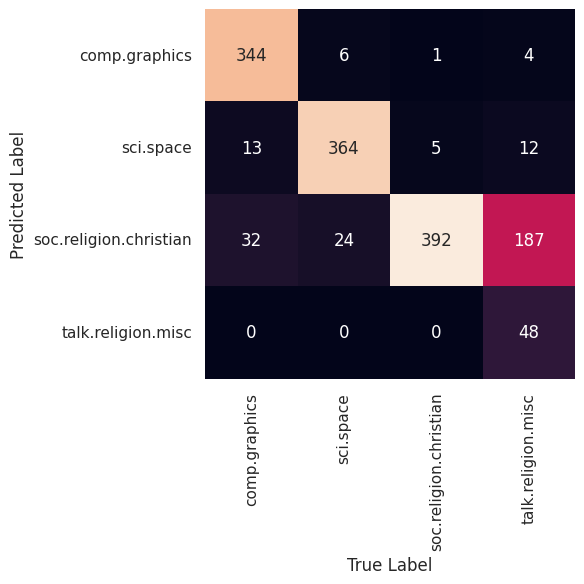

In [26]:
labels = model.predict(test.data)

cm = confusion_matrix(test.target, labels)

sns.heatmap(
    cm.T,
    square=True,
    annot=True,
    fmt="d",
    cbar=False,
    xticklabels=train.target_names,
    yticklabels=train.target_names,
)

plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()